In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tensorflow.keras import layers

In [2]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


In [3]:
x_train = cifar100_train_images
y_train = cifar100_train_labels

x_test = cifar100_test_images
y_test = cifar100_test_labels

In [4]:
## Change range form [0,255] to [0,1]

x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
x_train = x_train.reshape((x_train.shape[0], 32, 32, 3))
x_test = x_test.reshape((x_test.shape[0], 32, 32, 3))

In [6]:
y_train_label = keras.utils.to_categorical(y_train, num_classes=100)
y_test_label = keras.utils.to_categorical(y_test, num_classes=100)

### Building ANN Model

In [19]:
ann_model = keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(100, activation='softmax')
])

opt = keras.optimizers.Adam(learning_rate=1e-3)

ann_model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,835,748 (14.63 MB)

 Trainable params: 3,832,164 (14.62 MB)

 Non-trainable params: 3,584 (14.00 KB)

### Building CNN Model

In [11]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,204 (1.55 MB)

 Trainable params: 407,204 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### Training

In [21]:
callbacks = [
    keras.callbacks.ModelCheckpoint('best_ann_model.keras', save_best_only=True, monitor='val_loss'),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
]

history_ann = ann_model.fit(x_train, y_train_label,
                            epochs=100,
                            batch_size=128,
                            validation_data=(x_test, y_test_label),
                            callbacks=callbacks)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2380 - loss: 3.1064 - val_accuracy: 0.2672 - val_loss: 2.9968 - learning_rate: 2.5000e-04
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2390 - loss: 3.0916 - val_accuracy: 0.2684 - val_loss: 3.0056 - learning_rate: 2.5000e-04
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2386 - loss: 3.0896 - val_accuracy: 0.2669 - val_loss: 2.9999 - learning_rate: 2.5000e-04
Epoch 4/100
381/391 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2402 - loss: 3.0798
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2401 - loss: 3.0802 - val_accuracy: 0.2669 - val_loss: 2.9982 - learning_rate: 2.5000e-04
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2409 - loss: 3.0881 - val_accuracy: 0.2696 - val_loss: 2.9830 - learning_rate: 1.2500e-04
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy:

### Training CNN model

In [22]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [23]:
model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history = cnn_model.fit(
    x_train,
    y_train_label,
    epochs=70,
    batch_size=128,
    validation_data=(x_test, y_test_label),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/70
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0589 - loss: 4.1992
Epoch 1: val_loss improved from inf to 3.40082, saving model to best_basic_cnn_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.0590 - loss: 4.1984 - val_accuracy: 0.1895 - val_loss: 3.4008
Epoch 2/70
389/391 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2058 - loss: 3.2953
Epoch 2: val_loss improved from 3.40082 to 3.01690, saving model to best_basic_cnn_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2060 - loss: 3.2946 - val_accuracy: 0.2597 - val_loss: 3.0169
Epoch 3/70
384/391 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2785 - loss: 2.9071
Epoch 3: val_loss improved from 3.01690 to 2.82439, saving model to best_basic_cnn_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2787 - loss: 2.9063 - val_accuracy: 0.2986 - val_loss: 2.8244
Epoch 4/70
385/391 ━━━━━━━━━━━━━━━━━━━━ 

### Evaluation

/tmp/ipython-input-3299534381.py:40: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


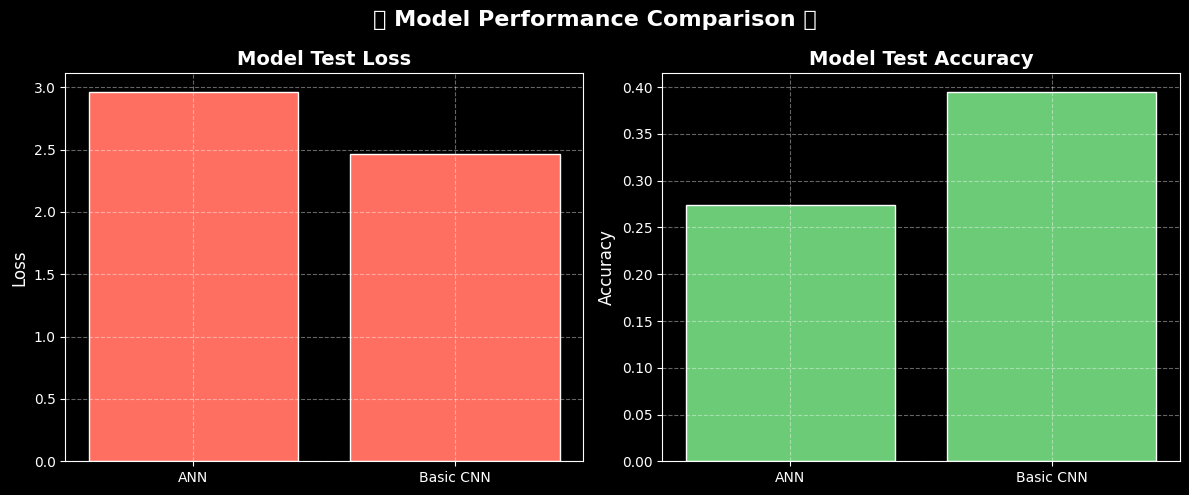

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

ann_model.load_weights('best_ann_model.keras')
cnn_model.load_weights('best_basic_cnn_model_weights.weights.h5')

loss_ann, accuracy_ann = ann_model.evaluate(x_test, y_test_label, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = cnn_model.evaluate(x_test, y_test_label, verbose=0)


import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ANN', 'Basic CNN']
losses = [loss_ann, loss_basic_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


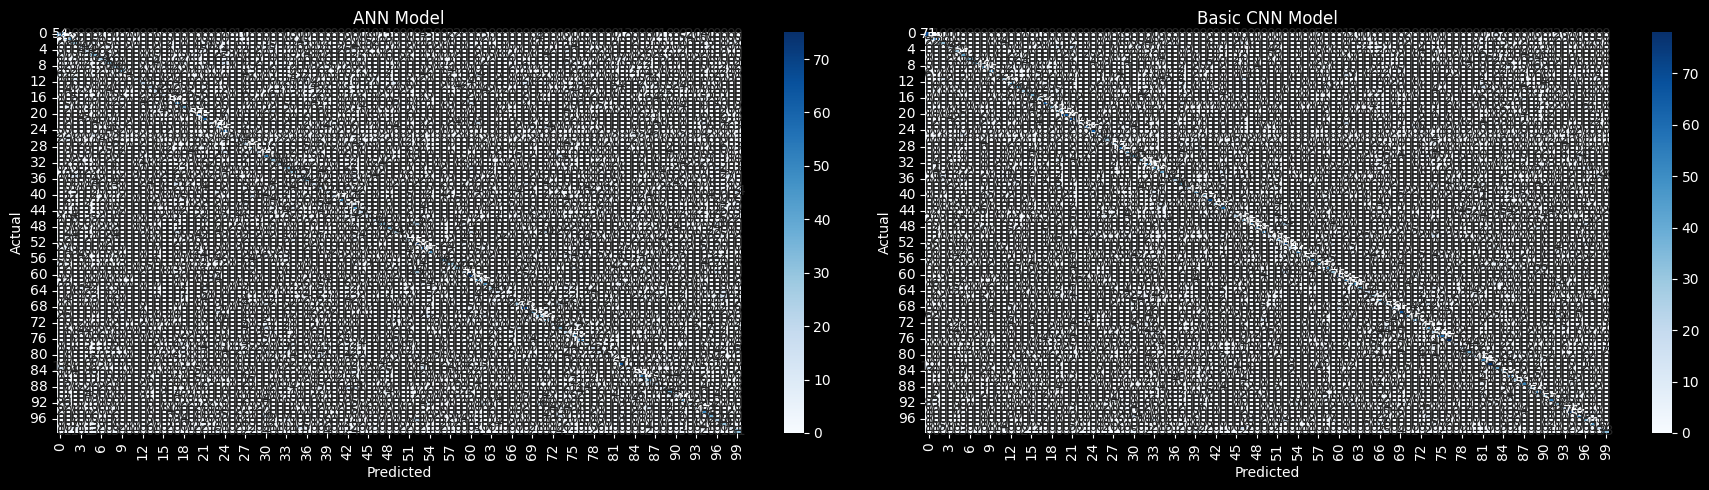

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
ann_predictions = ann_model.predict(x_test)
basic_cnn_predictions = cnn_model.predict(x_test)

# Convert labels
test_labels_int = np.argmax(y_test_label, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ANN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Basic CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", history_ann),
    "Basic CNN": ("magenta", basic_cnn_history),
}

performance_data = {
    'Model': ['ANN', 'Basic CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

### Prediction

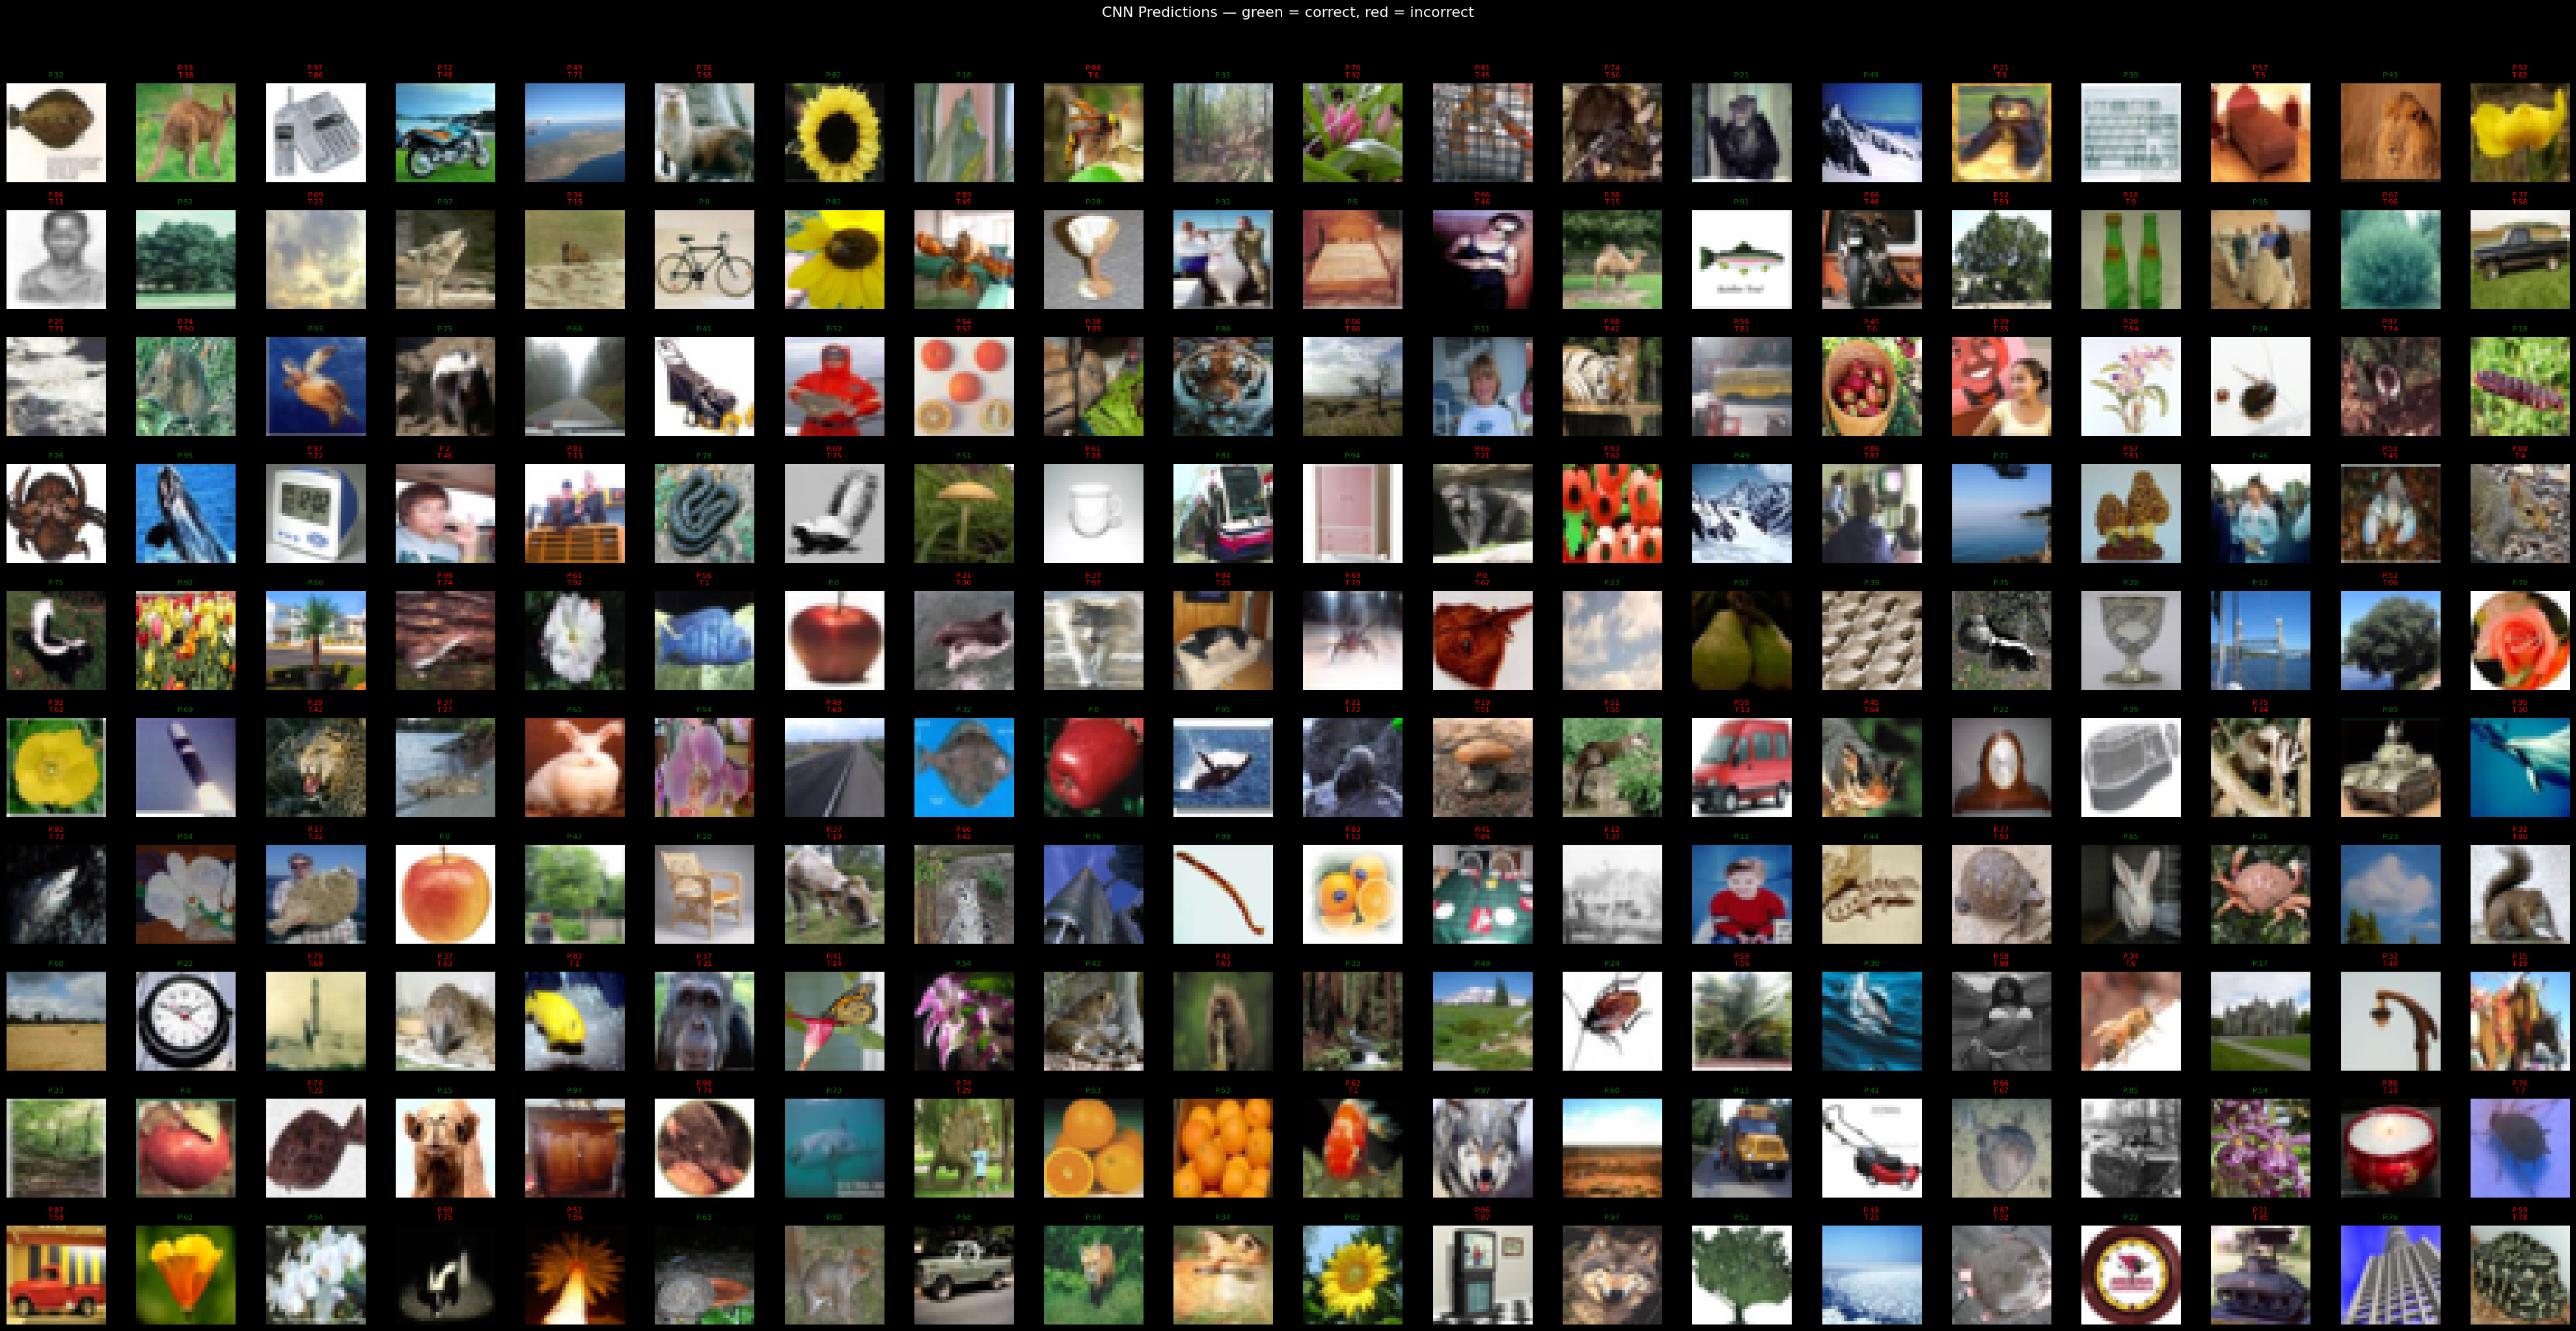

In [30]:
# Paste and run this cell (assumes cnn_model, x_test, y_test_label exist)

import numpy as np
import matplotlib.pyplot as plt
import math

# ---------- CONFIG ----------
num_correct_to_show = 100   # how many correct examples to sample
num_incorrect_to_show = 100 # how many incorrect examples to sample
num_cols = 20               # columns in grid (will adapt rows automatically)
random_seed = 42
# ----------------------------

np.random.seed(random_seed)

# Ensure arrays are numpy
test_images = np.array(x_test)
y_test_onehot = np.array(y_test_label)

# Convert one-hot to integer labels
if y_test_onehot.ndim == 2 and y_test_onehot.shape[1] > 1:
    test_labels = np.argmax(y_test_onehot, axis=1)
else:
    # fallback (shouldn't happen given your guarantee)
    test_labels = np.array(y_test_onehot).reshape(-1)

# Predict (batching handled by Keras)
pred_probs = cnn_model.predict(test_images, verbose=0)
predicted_labels = np.argmax(pred_probs, axis=1)

# Indices of correct / incorrect predictions
correct_idx = np.where(predicted_labels == test_labels)[0]
incorrect_idx = np.where(predicted_labels != test_labels)[0]

# Safety: don't request more samples than available
num_correct_to_show = min(num_correct_to_show, len(correct_idx))
num_incorrect_to_show = min(num_incorrect_to_show, len(incorrect_idx))

if num_correct_to_show + num_incorrect_to_show == 0:
    raise ValueError("No correct or incorrect samples available. Check labels/predictions.")

# Randomly sample indices without replacement
selected_correct = (np.random.choice(correct_idx, num_correct_to_show, replace=False)
                    if num_correct_to_show > 0 else np.array([], dtype=int))
selected_incorrect = (np.random.choice(incorrect_idx, num_incorrect_to_show, replace=False)
                      if num_incorrect_to_show > 0 else np.array([], dtype=int))

all_indices = np.concatenate((selected_correct, selected_incorrect))
np.random.shuffle(all_indices)

# Optional: provide CIFAR-100 class names in a list named `class_names` in the workspace.
use_names = 'class_names' in globals() and isinstance(globals()['class_names'], (list, tuple)) \
            and len(globals()['class_names']) >= 100
if use_names:
    names = globals()['class_names']
    def lab_name(i): return names[int(i)]
else:
    def lab_name(i): return str(int(i))

# Grid layout
num_images = len(all_indices)
num_rows = math.ceil(num_images / num_cols)
fig_w = max(8, 0.12 * num_cols * 100 / 100)   # reasonable default sizing
fig_h = max(4, 0.12 * num_rows * 100 / 100)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
fig.suptitle("CNN Predictions — green = correct, red = incorrect", fontsize=16, y=1.02)

# Flatten axes for easy indexing
if isinstance(axes, np.ndarray):
    axes_flat = axes.flatten()
else:
    axes_flat = np.array([axes])

# Turn off unused subplots
for ax in axes_flat[num_images:]:
    ax.axis('off')

for i, idx in enumerate(all_indices[:num_images]):
    ax = axes_flat[i]
    img = test_images[idx]

    # Ensure image is HxWx3; handle shapes like (32,32,3) or (3,32,32) etc.
    if img.ndim == 3 and img.shape[0] == 3 and img.shape[2] != 3:
        # maybe (3,32,32) -> transpose
        img = np.transpose(img, (1, 2, 0))

    # Normalize for display: if uint8 [0,255] convert to [0,1], if float assume already [0,1]
    if img.dtype == np.uint8:
        disp_img = img.astype('float32') / 255.0
    else:
        # clip to [0,1] for safety
        disp_img = np.clip(img, 0.0, 1.0)

    ax.imshow(disp_img)
    pred = int(predicted_labels[idx])
    true = int(test_labels[idx])

    if pred == true:
        color = "green"
        title = f"P:{lab_name(pred)}"
    else:
        color = "red"
        title = f"P:{lab_name(pred)}\nT:{lab_name(true)}"

    ax.set_title(title, fontsize=8, color=color)
    ax.axis("off")

plt.tight_layout()
plt.show()
